<a href="https://colab.research.google.com/github/thanchanok-a/thanchanok-a/blob/main/netflix_user_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Netflix Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # Import the pandas library and assign it to the alias 'pd'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv')

In [ ]:
#import libraries
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [ ]:
df.shape

(6234, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#check for Null Values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,1969
cast,570
country,476
date_added,11
release_year,0
rating,10
duration,0


In [ ]:
#check unique values
df.nunique()

,0
show_id,6234
type,2
title,6172
director,3301
cast,5469
country,554
date_added,1524
release_year,72
rating,14
duration,201


In [ ]:
#check duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
netflix = df.copy() # Assign a copy of 'df' to the variable 'netflix'

In [ ]:
df.shape

(6234, 12)

In [ ]:
#drop Null values
df=df.dropna()
df.shape

(3774, 12)

In [ ]:
# Convert 'date_added' to datetime, handling errors and specifying format
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Format as dd-mm-yyyy for valid dates
df['date_added_formatted'] = df['date_added'].dt.strftime('%d-%m-%Y')

<ipython-input-13-ad819c98d44e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
<ipython-input-13-ad819c98d44e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added_formatted'] = df['date_added'].dt.strftime('%d-%m-%Y')


In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_formatted
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,09-09-2019
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,08-09-2017
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",08-09-2017
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,08-09-2017
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,08-09-2017
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",08-09-2017
19,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium",2017-09-08,2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...,08-09-2017
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,2017-09-08,2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,08-09-2017
21,80046728,Movie,Moonwalkers,Antoine Bardou-Jacquet,"Ron Perlman, Rupert Grint, Robert Sheehan, Ste...","France, Belgium",2017-09-08,2015,R,96 min,"Action & Adventure, Comedies, International Mo...","A brain-addled war vet, a failing band manager...",08-09-2017
23,70304988,Movie,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,2017-09-08,2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f...",08-09-2017


Data Visualization

Text(0.5, 1.0, 'Type')

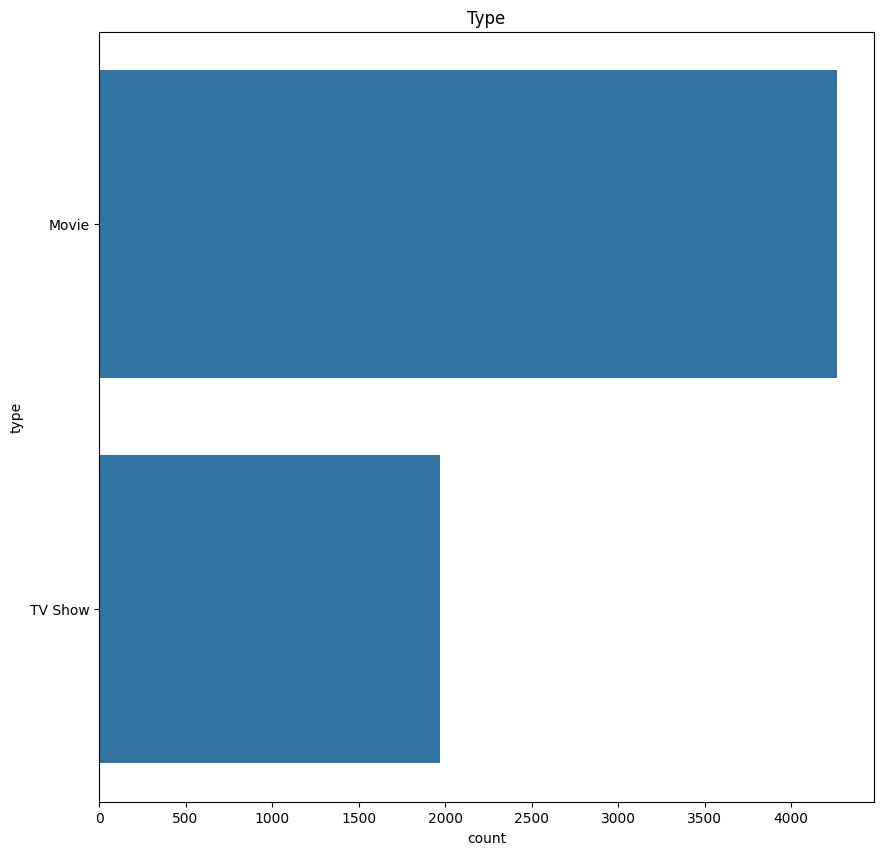

In [ ]:
#Type movie and TV show
sns.countplot(netflix['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

<ipython-input-16-bea06341dd97>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")


Text(0.5, 1.0, 'Rating')

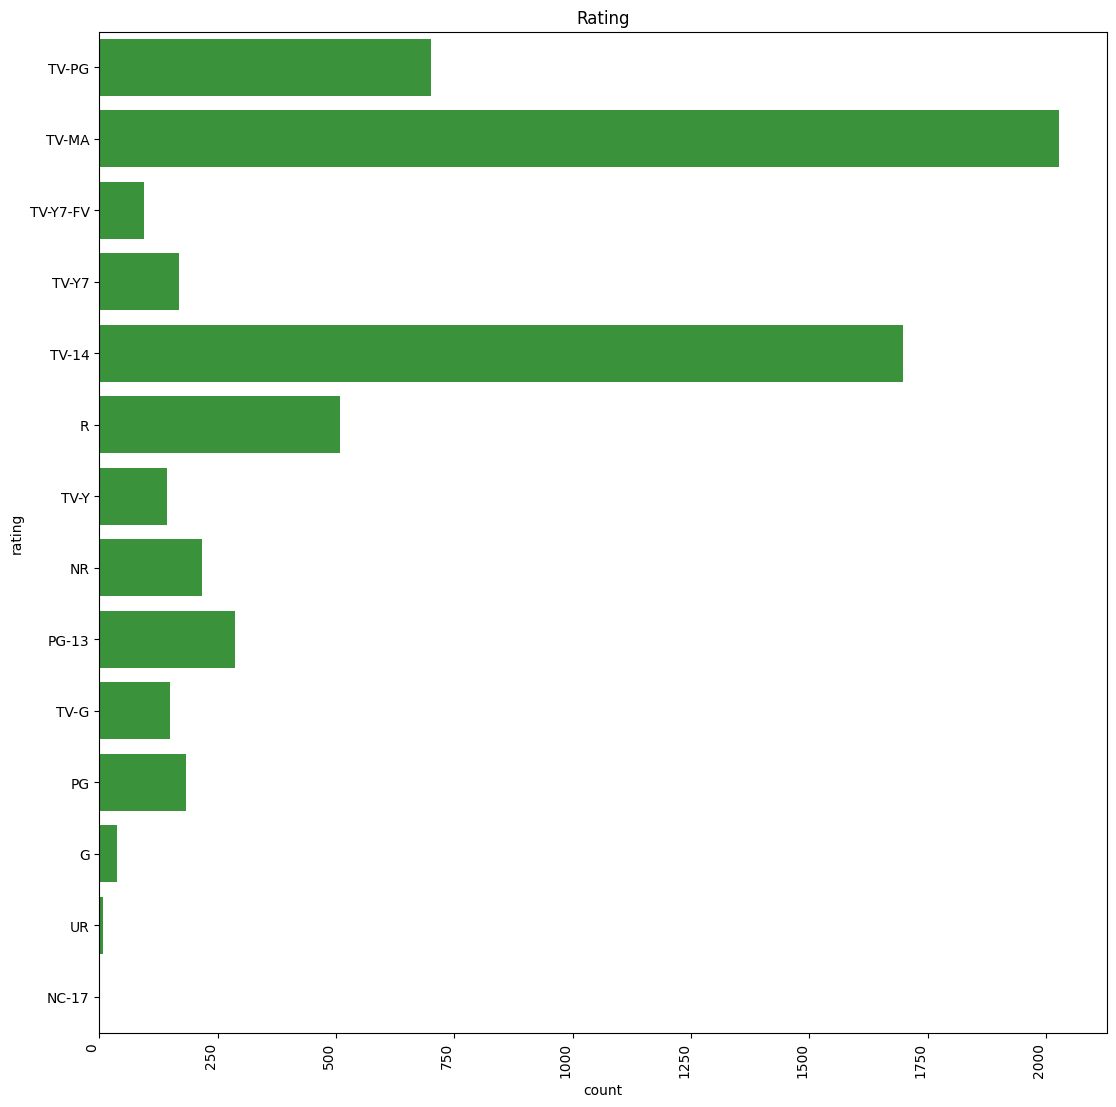

In [ ]:
#Rating of show and movies
sns.countplot(netflix['rating'])
sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

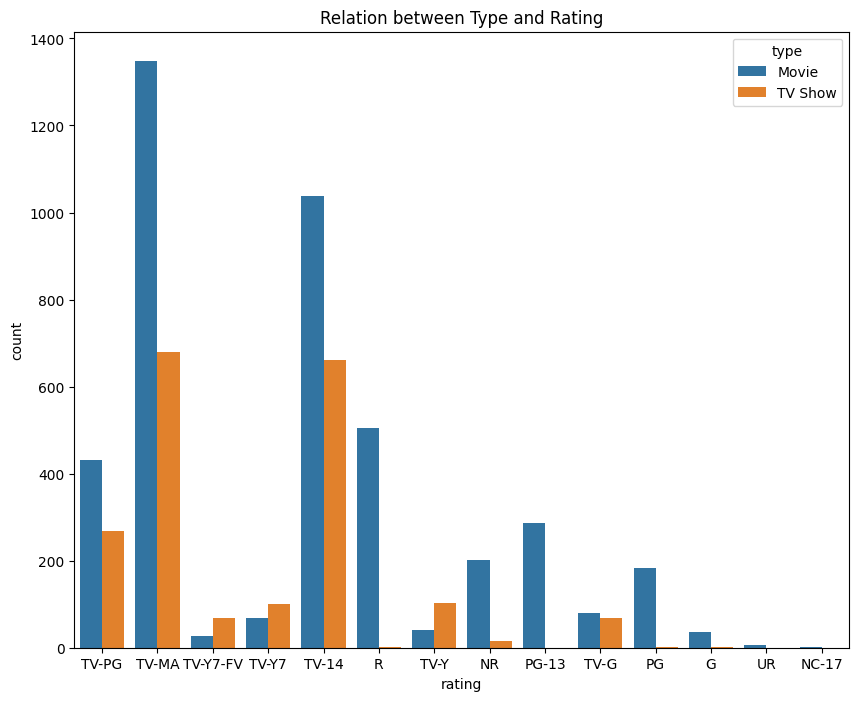

In [ ]:
#Relation between Type and Rating
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()

WordCloud

In [ ]:
from wordcloud import WordCloud

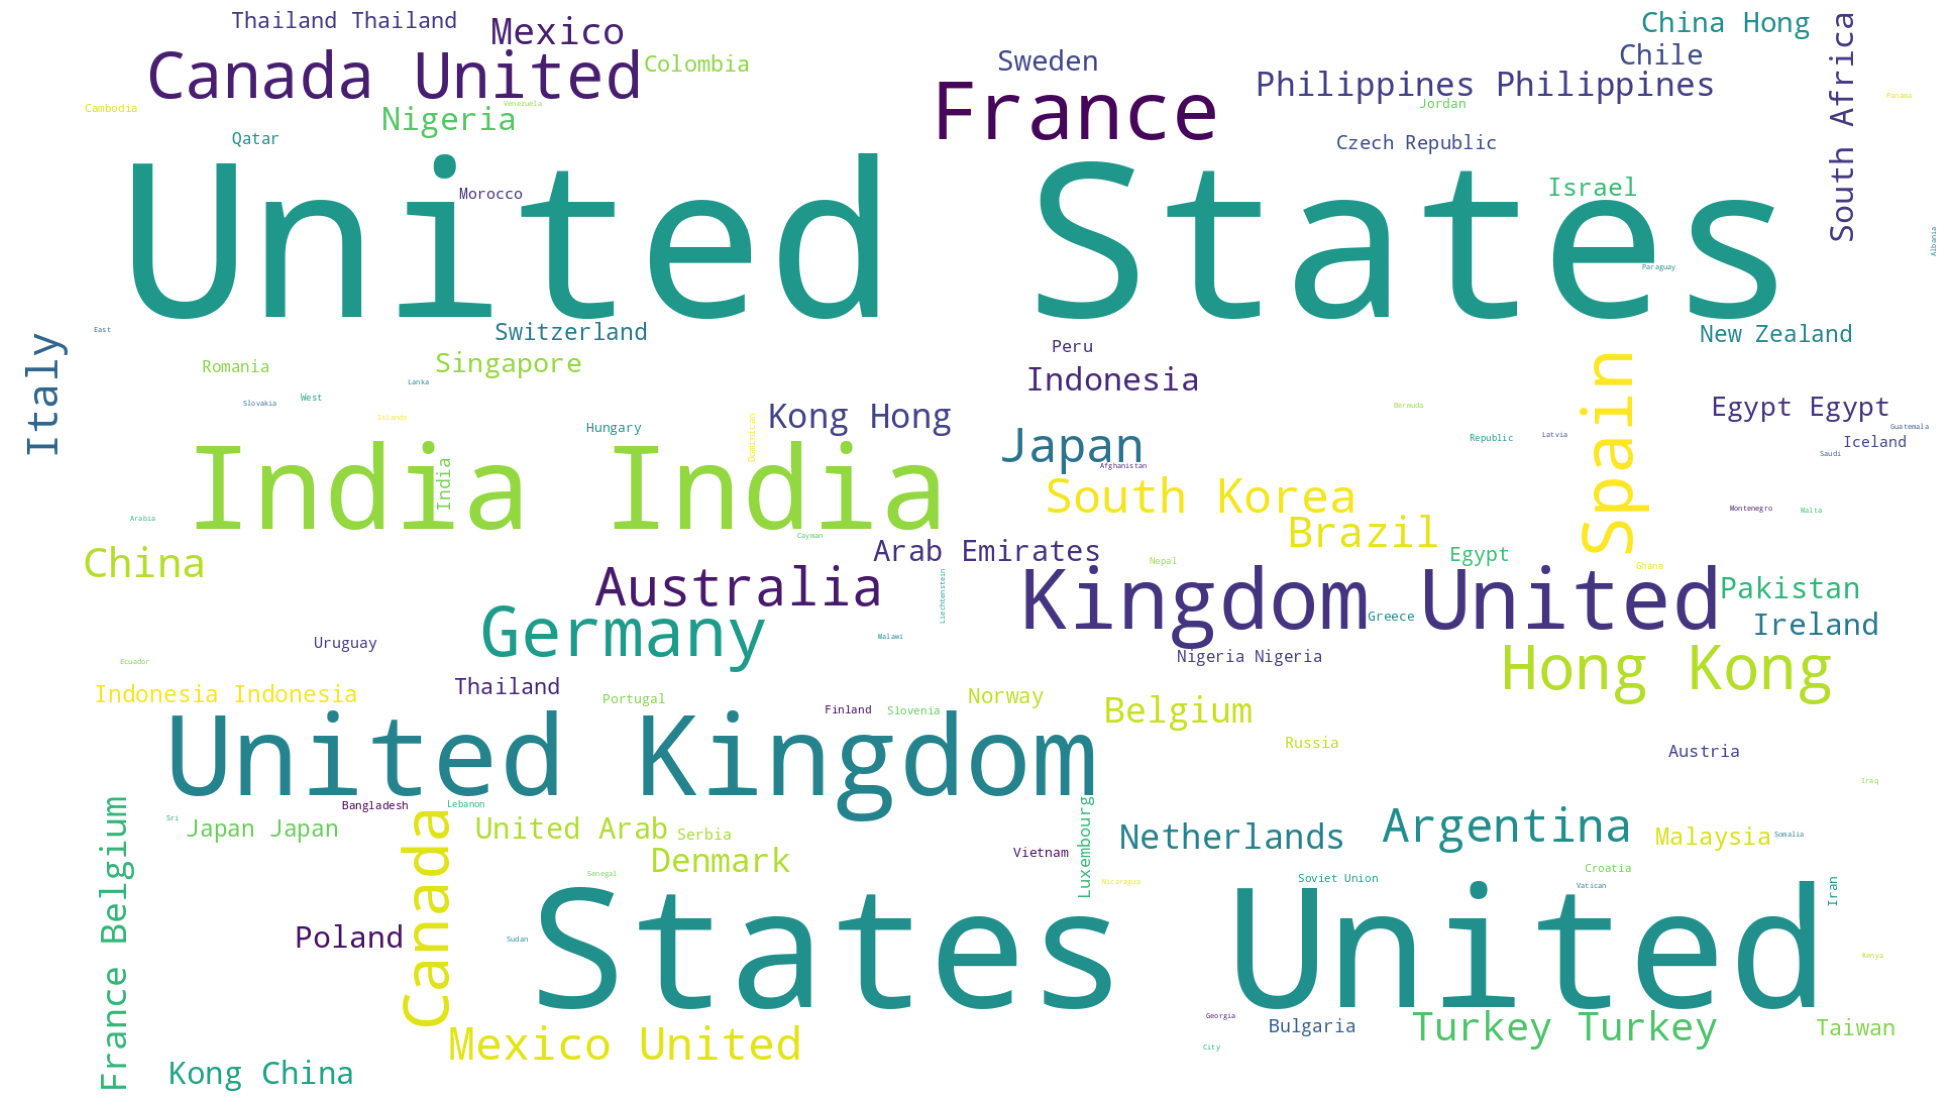

In [ ]:
#Country
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

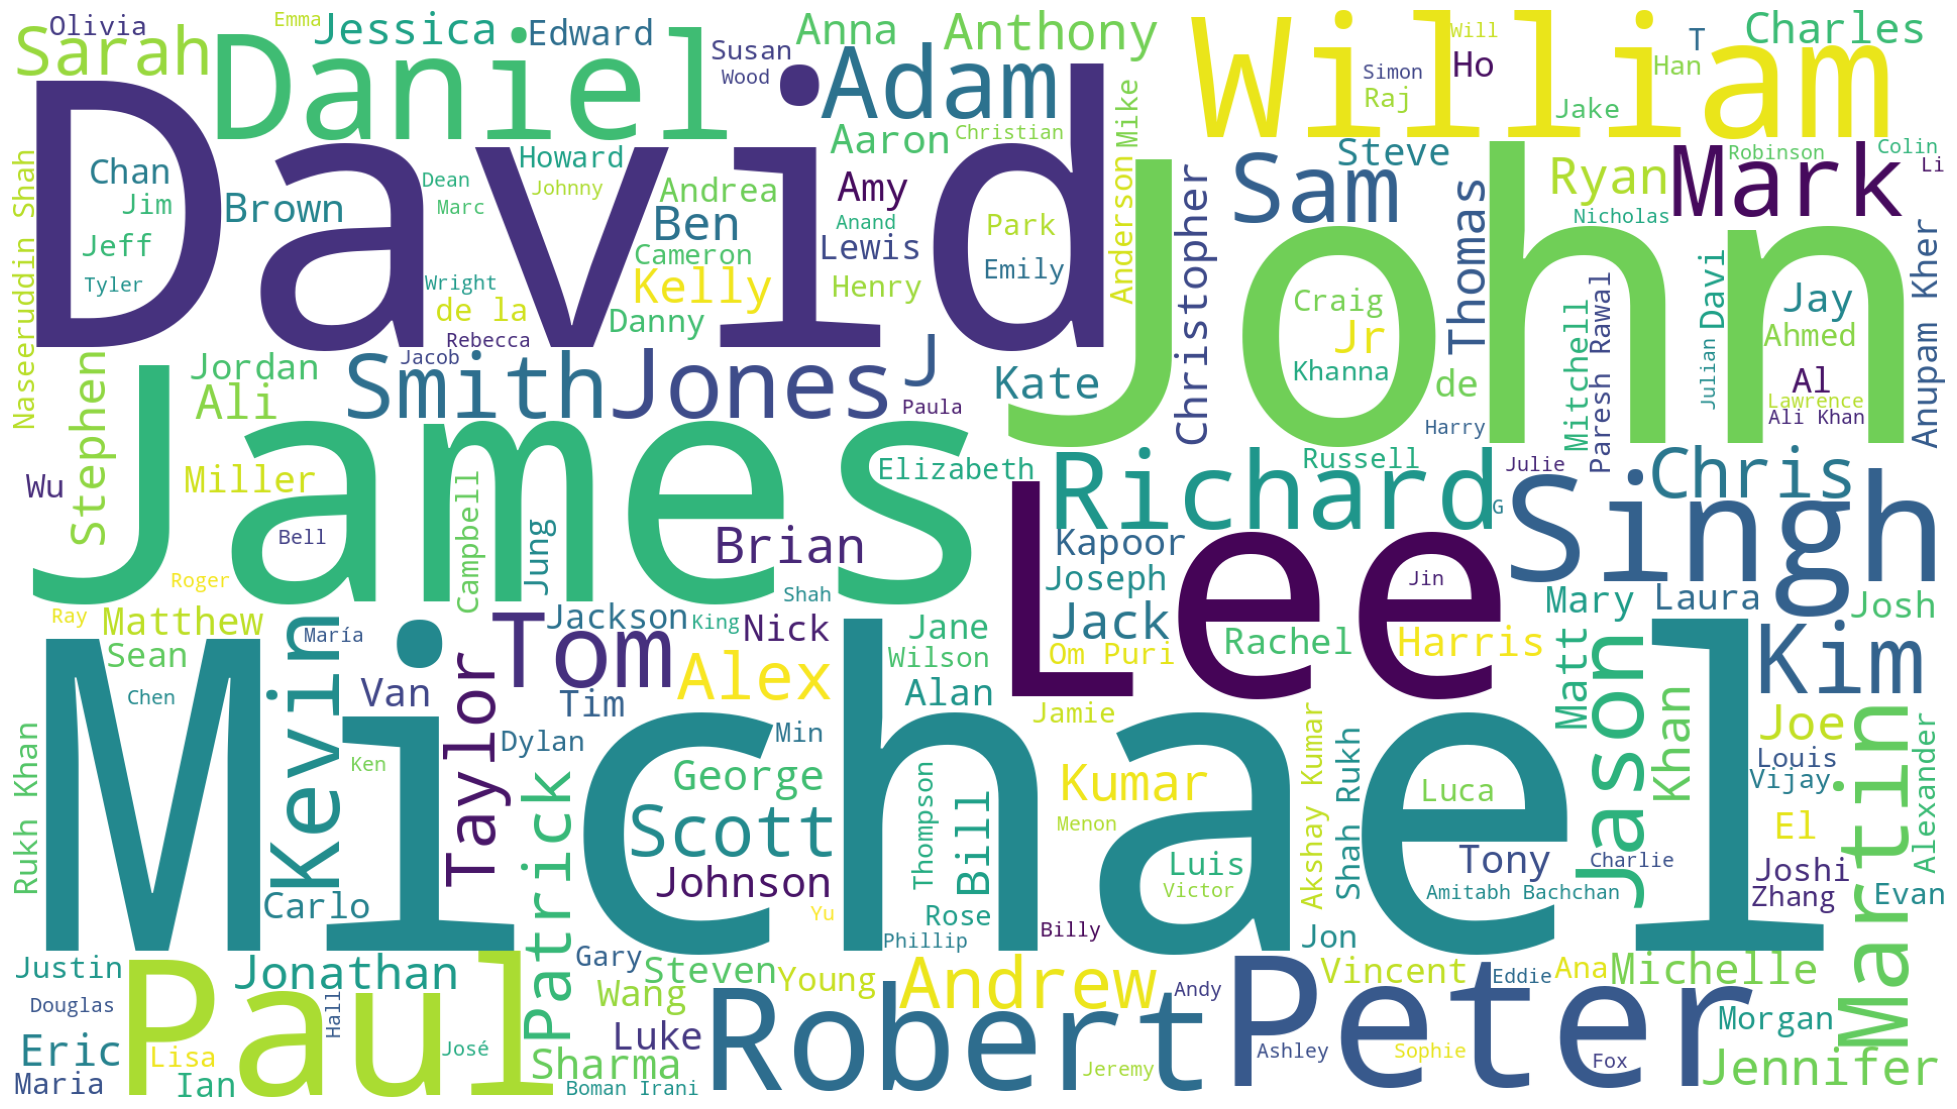

In [ ]:
#Casting
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

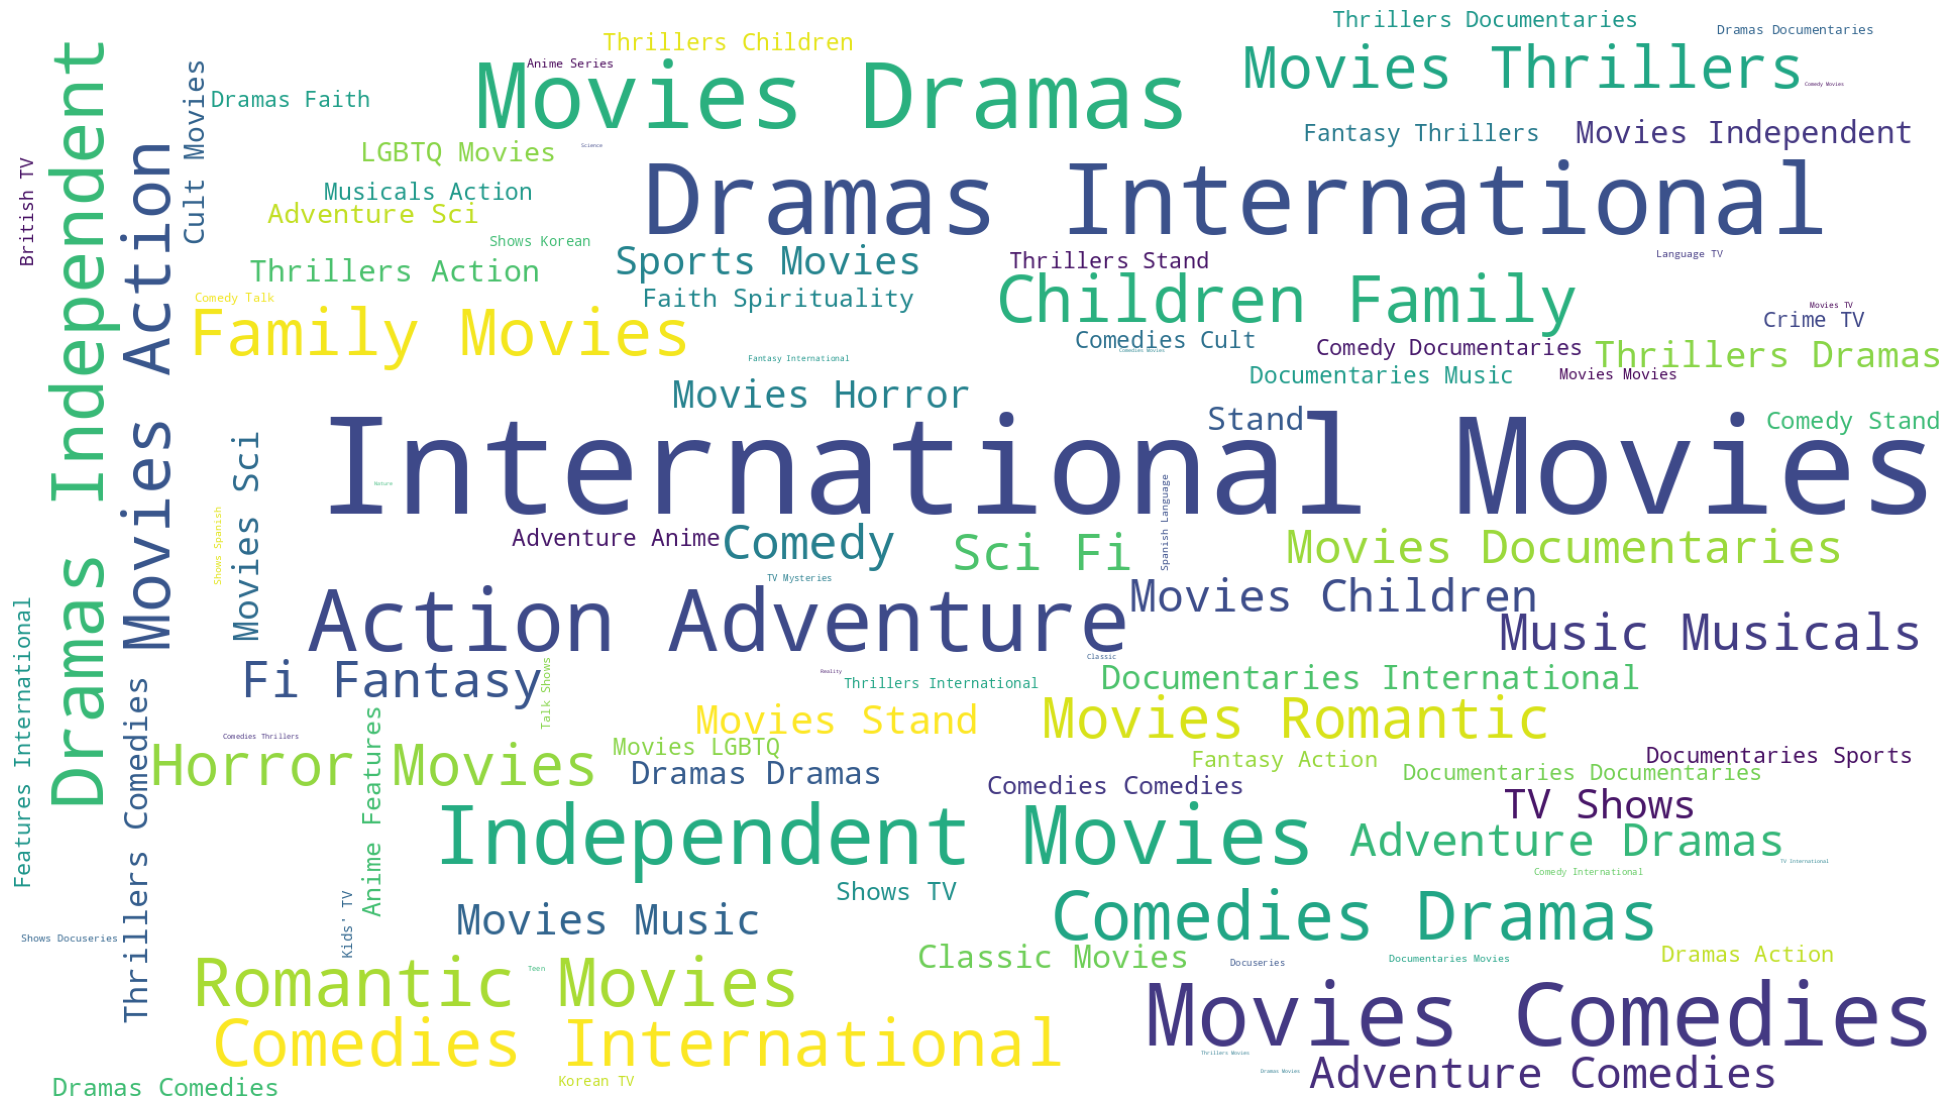

In [ ]:
#Categories
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

TF-IDF technique (Text-Based clustering)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
texts = df['description'].values

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(texts)

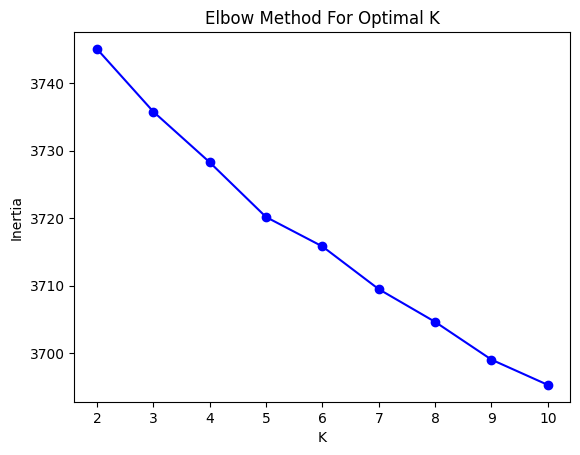

In [ ]:
inertia = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


In [ ]:
k = 5 # change based on elbow
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


In [ ]:
for i in range(k):
    print(f'\nCluster {i} Sample Descriptions:')  # Changed to 'Descriptions' to match clustering basis
    # Access 'description' column from the original netflix DataFrame
    print(netflix[netflix.index.isin(df[df['Cluster'] == i].index)]['description'].head(5).to_string(index=False))


Cluster 0 Sample Descriptions:
Fabrizio Copano takes audience participation to...
Battle-scarred stand-up comedian Marc Maron unl...
Comedian Mo Gilligan blends smooth moves and sh...
In this special live event, giants of stand-up ...
The stand-up sensation tackles TV's "Shark Tank...

Cluster 1 Sample Descriptions:
When a broken ATM dishes out a fortune, a coupl...
A socially awkward 19-year-old genius makes big...
A single woman seizes an opportunity when, whil...
Years after their father disappears, Meg and he...
When struggling singer Onur decides to return t...

Cluster 2 Sample Descriptions:
Before planning an awesome wedding for his gran...
When nerdy high schooler Dani finally attracts ...
In a dystopian future, an insurance adjuster fo...
A struggling couple can't believe their luck wh...
When beer magnate Alfred "Freddy" Heineken is k...

Cluster 3 Sample Descriptions:
In 1899, a young doctor arrives at an asylum fo...
As a volatile young couple who have been togeth...
A dru

In [ ]:
# Get centroids
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print(f"\nCluster {i} Top Keywords:")
    for ind in order_centroids[i, :10]:
        print(terms[ind], end=', ')
    print()


Cluster 0 Top Keywords:
stand, special, comedian, comedy, comic, stage, takes, shares, sex, topics, 

Cluster 1 Top Keywords:
job, single, following, heart, attack, mother, old, life, love, son, 

Cluster 2 Top Keywords:
family, man, world, friends, school, love, old, woman, father, high, 

Cluster 3 Top Keywords:
young, man, woman, love, father, girl, falls, family, help, boy, 

Cluster 4 Top Keywords:
life, new, york, love, city, family, world, man, finds, woman, 


In [ ]:
#Add  manual theme to each cluster
cluster_labels = {
    0: 'Stand-up Comedy / Specials',
    1: 'Dramas about Personal Struggles',
    2: 'Family & Slice of Life',
    3: 'Romantic Dramas / Coming of Age',
    4: 'Urban Life & Relationships',

}

df['Cluster_Label'] = df['Cluster'].map(cluster_labels)


In [ ]:
for label in df['Cluster_Label'].unique():
    print(f"\n--- {label} ---")
    print(netflix[netflix.index.isin(df[df['Cluster_Label'] == label].index)]['title'].head(5)) # Changed df to netflix


--- Family & Slice of Life ---
0     Norm of the North: King Sized Adventure
4                                #realityhigh
6                                    Automata
9                                 Good People
11                    Kidnapping Mr. Heineken
Name: title, dtype: object

--- Stand-up Comedy / Specials ---
7      Fabrizio Copano: Solo pienso en mi
53                   Marc Maron: Too Real
62                  Mo Gilligan: Momentum
113                     Def Comedy Jam 25
134     Iliza Shlesinger: Confirmed Kills
Name: title, dtype: object

--- Romantic Dramas / Coming of Age ---
23    Stonehearst Asylum
25               6 Years
42             Hard Tide
50               Shutter
55                Saawan
Name: title, dtype: object

--- Urban Life & Relationships ---
24                          The Runner
59                       Black Panther
76                    Act of Vengeance
109                             Malaal
114    Restless Creature: Wendy Whelan
Name: title, d

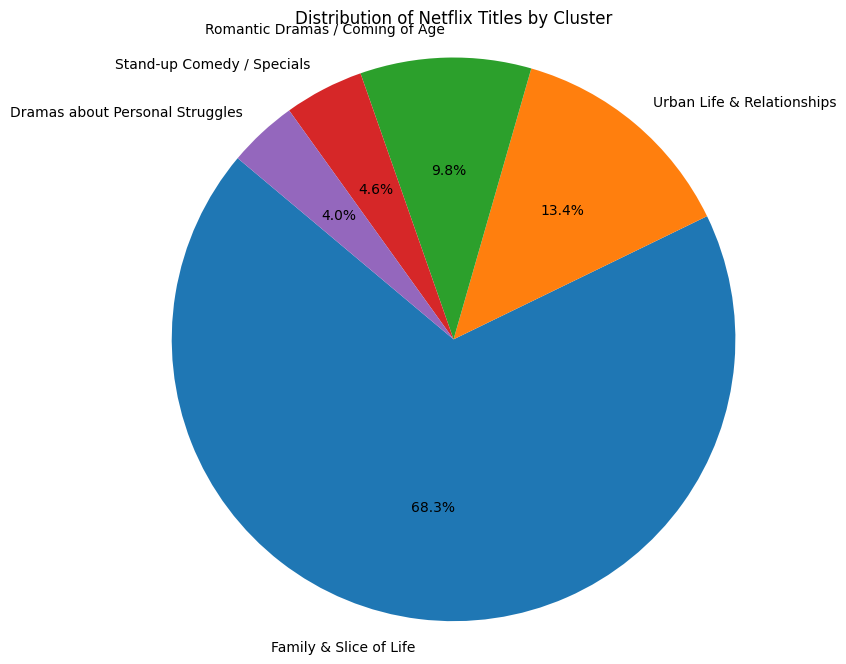

In [ ]:
# Count of clusters
cluster_counts = df['Cluster_Label'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Netflix Titles by Cluster')
plt.axis('equal')
plt.show()


Audience Target and Business Insights

In [ ]:
# Select useful columns for audience targeting
selected_columns = ['type', 'release_year', 'rating', 'duration', 'listed_in']
df = df[selected_columns].dropna()
df.head()

,type,release_year,rating,duration,listed_in
0,Movie,2019,TV-PG,90 min,"Children & Family Movies, Comedies"
4,Movie,2017,TV-14,99 min,Comedies
6,Movie,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,Movie,2017,TV-MA,60 min,Stand-Up Comedy
9,Movie,2014,R,90 min,"Action & Adventure, Thrillers"


In [ ]:
# Convert duration to numeric (for shows with 'min')
# Check if the column is of type object (string) before using .str
if df['duration'].dtype == object:
    df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
else:
    # If not an object, it's likely already numeric, so no action needed
    pass

# Simplify genres
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['type', 'rating', 'main_genre']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Final features
features = df[['type', 'release_year', 'rating', 'duration', 'main_genre']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

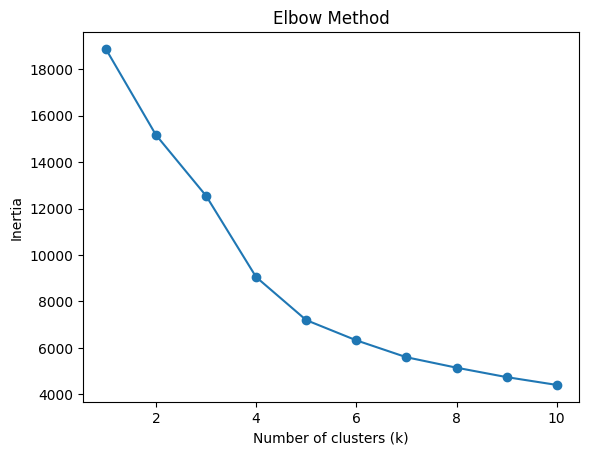

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
k = 4  # Choose based on Elbow graph
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

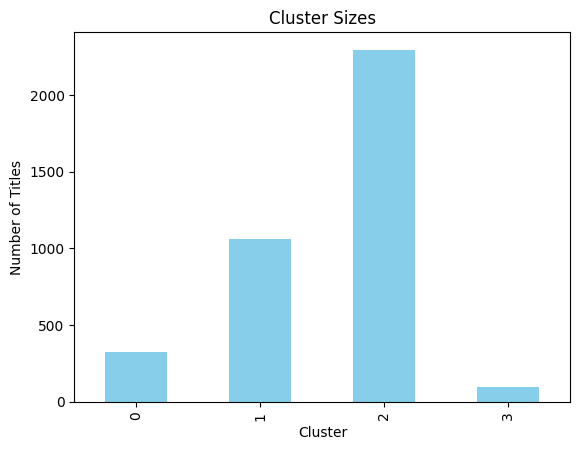

In [ ]:
df['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Titles')
plt.show()

In [ ]:
cluster_profiles = df.groupby('Cluster').agg({
    'release_year': 'median',
    'duration': 'mean',
    'type': lambda x: x.mode()[0],
    'rating': lambda x: x.mode()[0],
    'main_genre': lambda x: x.mode()[0]
})

# Decode labels
for col in ['type', 'rating', 'main_genre']:
    cluster_profiles[col] = cluster_profiles[col].apply(
        lambda x: label_encoders[col].inverse_transform([int(x)])[0]
    )

cluster_profiles

,release_year,duration,type,rating,main_genre
Cluster,,,,,
0,2017.0,69.757764,Movie,TV-MA,Stand-Up Comedy
1,2007.0,109.858624,Movie,R,Action & Adventure
2,2016.0,103.609586,Movie,TV-MA,Dramas
3,2017.0,2.177083,TV Show,TV-14,International TV Shows
